## Task A (SQL)

### The Most Popular Client_Id Among Users Using Video and Voice Calls
- Select the most popular client_id based on a count of the number of users who have at least 50% of their events
from the following list: 'video call received', 'video call sent', 'voice call received', 'voice call sent'.

### Step 1 filter the event types and return the count of events per user_IDm

In [11]:
## this query is used to return the count per user_id of the required event_type Only 
'''(SELECT  user_id , sum(CASE WHEN  event_type IN ('video call received',
                    'video call sent', 'voice call received',
                    'voice call sent') THEN 1 ELSE 0 END) AS event_type_count
FROM fact_events
GROUP BY user_id 
ORDER BY event_type_count DESC)'''

"(SELECT  user_id , sum(CASE WHEN  event_type IN ('video call received',\n                    'video call sent', 'voice call received',\n                    'voice call sent') THEN 1 ELSE 0 END) AS event_type_count\nFROM fact_events\nGROUP BY user_id \nORDER BY event_type_count DESC)"

In [6]:
#Output

In [ ]:
'''(user_id	event_type_count
9237-HQITU	6
7469-LKBCI	4
8091-TTVAX	3
5575-GNVDE	3
7590-VHVEG	2
9763-GRSKD	2
4183-MYFRB	2
5129-JLPIS	2
9305-CDSKC	2
6388-TABGU	1
7795-CFOCW	1
9959-WOFKT	1
4190-MFLUW	1
8191-XWSZG	1
3668-QPYBK	1
0280-XJGEX	0
3655-SNQYZ	0
1452-KIOVK	0
6713-OKOMC	0)'''

### Step 2 : filter on the user_id who has at least 50% of events in the required types

In [ ]:
# this query is used to return the count per user_id of  the required event_type Only
''' (with CTE AS (
SELECT  user_id , 
CAST(SUM(CASE WHEN event_type IN ('video call received',
                    'video call sent', 'voice call received',
                    'voice call sent')
                    THEN 1
                ELSE 0
            END) AS FLOAT)  / COUNT(event_type) AS events_count_percentage
FROM fact_events
GROUP BY user_id
having CAST(SUM(CASE WHEN event_type IN ('video call received',
                    'video call sent', 'voice call received',
                    'voice call sent')
                    THEN 1
                ELSE 0
            END) AS FLOAT)  / COUNT(event_type) >= .50 )
SELECT * FROM CTE ) '''

In [12]:
#user_id	events_count_percentage
#9237-HQITU	0.6
#4183-MYFRB	0.5

> there are 2 users who have at least 50% of their events from the following list: 'video call received', 'video call sent', 'voice call received', 'voice call sent'.

## Step 3: Select the most popular client_id based on a count of the number of users

In [ ]:
'''(with CTE AS (
SELECT  user_id , 
CAST(SUM(CASE WHEN event_type IN ('video call received',
                    'video call sent', 'voice call received',
                    'voice call sent')
                    THEN 1
                ELSE 0
            END) AS FLOAT)  / COUNT(event_type) AS events_count_percentage
FROM fact_events
GROUP BY user_id
having CAST(SUM(CASE WHEN event_type IN ('video call received',
                    'video call sent', 'voice call received',
                    'voice call sent')
                    THEN 1
                ELSE 0
            END) AS FLOAT)  / COUNT(event_type) >= .50 )
SELECT fact_events.client_id ,COUNT(CTE.user_id) as users_count
FROM CTE
INNER JOIN fact_events
ON CTE.user_id = fact_events.user_id
GROUP BY 
    client_id
ORDER BY users_count DESC)'''

In [13]:
#client_id	users_count
#desktop	11
#mobile	3

### Step4: Select the most popular client_id based on a count of the number of users who have at least 50% of their events from the following list: 'video call received', 'video call sent', 'voice call received', 'voice call sent'.

In [ ]:
'''(-- this common table expression is used to return events_count_percentage per user Id 
with CTE AS (
SELECT  user_id , 
CAST(SUM(CASE WHEN event_type IN ('video call received',
                    'video call sent', 'voice call received',
                    'voice call sent')
                    THEN 1
                ELSE 0
            END) AS FLOAT)  / COUNT(event_type) AS events_count_percentage
FROM fact_events
GROUP BY user_id
having CAST(SUM(CASE WHEN event_type IN ('video call received',
                    'video call sent', 'voice call received',
                    'voice call sent')
                    THEN 1
                ELSE 0
            END) AS FLOAT)  / COUNT(event_type) >= .50 )
-- the following query used to count the num of users ID per client Id filtered by events_count_percentage of required list 
SELECT fact_events.client_id ,COUNT(CTE.user_id) as users_count, 
dense_rank() OVER(ORDER BY COUNT(CTE.user_id) DESC ) rank_clients
FROM CTE
INNER JOIN fact_events
ON CTE.user_id = fact_events.user_id
GROUP BY 
    client_id
ORDER BY dense_rank() OVER(ORDER BY COUNT(CTE.user_id) DESC ) ASC
LIMIT 1)'''

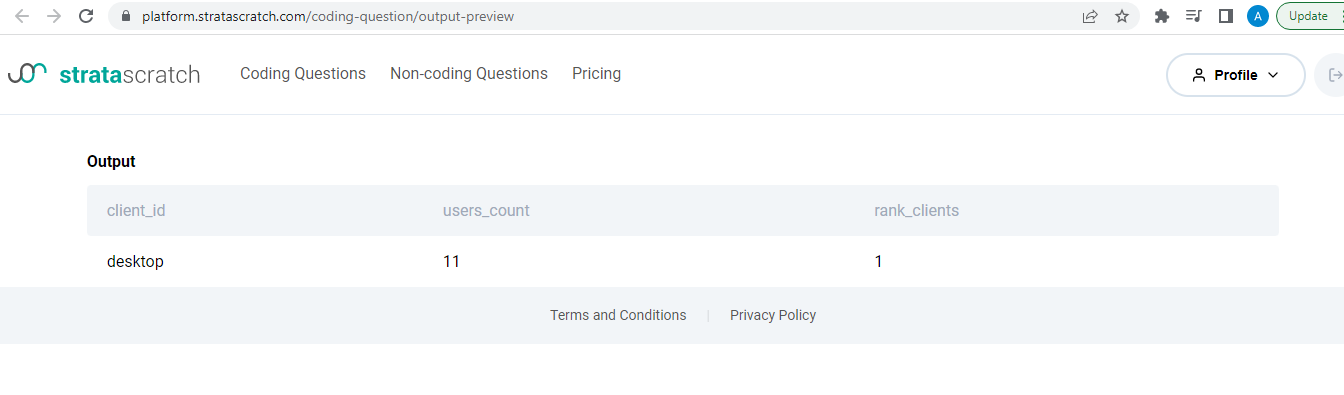

### Final Query :
> To return only the client Id  based on a count of the number of users who have at least 50% of their events from the eequired list

In [ ]:
'''(-- this common table expression is used to return events_count_percentage per user Id 
WITH cte
AS
  (
           SELECT   user_id ,
                    cast(sum(
                    CASE
                             WHEN event_type IN ('video call received',
                                                 'video call sent',
                                                 'voice call received',
                                                 'voice call sent') THEN 1
                             ELSE 0
                    end) AS FLOAT) / count(event_type) AS events_count_percentage
           FROM     fact_events
           GROUP BY user_id
           HAVING   cast(sum(
                    CASE
                             WHEN event_type IN ('video call received',
                                                 'video call sent',
                                                 'voice call received',
                                                 'voice call sent') THEN 1
                             ELSE 0
                    end) AS FLOAT) / count(event_type) >= .50 )
-- the following query used to return the most popular client ID based on the dense rank of number of users filtered by events_count_percentage of required list 
  SELECT     fact_events.client_id
  FROM       cte
  INNER JOIN fact_events
  ON         cte.user_id = fact_events.user_id
  GROUP BY   client_id
  ORDER BY   dense_rank() over(ORDER BY count(cte.user_id) DESC ) ASC
  LIMIT      1)'''

### Output

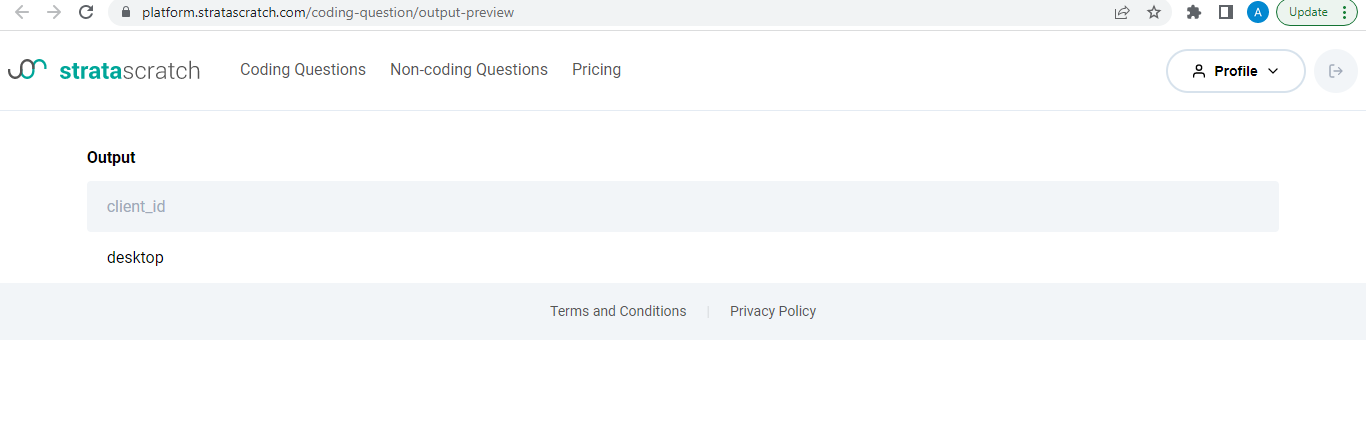